Machine learning model for Wrocław rent price in dependence of ['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
       'centreDistance', 'poiCount', 'schoolDistance', 'clinicDistance',
       'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
       'collegeDistance', 'pharmacyDistance', 'hasParkingSpace', 'hasBalcony',
       'hasElevator', 'hasSecurity', 'hasStorageRoom', 'buildingAge',
       'type_apartmentBuilding', 'type_blockOfFlats', 'type_tenement',
       'buildingMaterial_brick', 'buildingMaterial_concreteSlab',
       'condition_low', 'condition_premium']

In [ ]:
# Data cleaning for Wrocław
import pandas as pd
path="./../data/processed/1_analysis_rent.csv"
data=pd.read_csv(path)
data=data.drop(columns=["id", "Unnamed: 0", 'latitude', 'longitude','Period'])
data=data[data["city"]=="wroclaw"]
# Numerical variables for categorical data
data= pd.get_dummies(data, drop_first=True)
x=data.drop(columns="price")
y=data["price"]

Index(['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear',
       'centreDistance', 'poiCount', 'schoolDistance', 'clinicDistance',
       'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
       'collegeDistance', 'pharmacyDistance', 'hasParkingSpace', 'hasBalcony',
       'hasElevator', 'hasSecurity', 'hasStorageRoom', 'buildingAge',
       'type_apartmentBuilding', 'type_blockOfFlats', 'type_tenement',
       'buildingMaterial_brick', 'buildingMaterial_concreteSlab',
       'condition_low', 'condition_premium'],
      dtype='object')


Comparison of Linear regresion, Random Forest, and XGBoost accuracy. 
Comparison of R^2, RMSE, and average for cross-validation.
Evaluation best parameters for models.
Indication of feature importance.

Linear Regression (defalut parameters):
RMSE: 672.8003810530402
R²: 0.7013427142417246
Cross-validated R^2: 0.680 ± 0.024641
Random Forest ()
RMSE: 360.529506431187
R² Score: 0.914
Cross-validated R²: 0.908 ± 0.027393
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best R²: 0.896
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


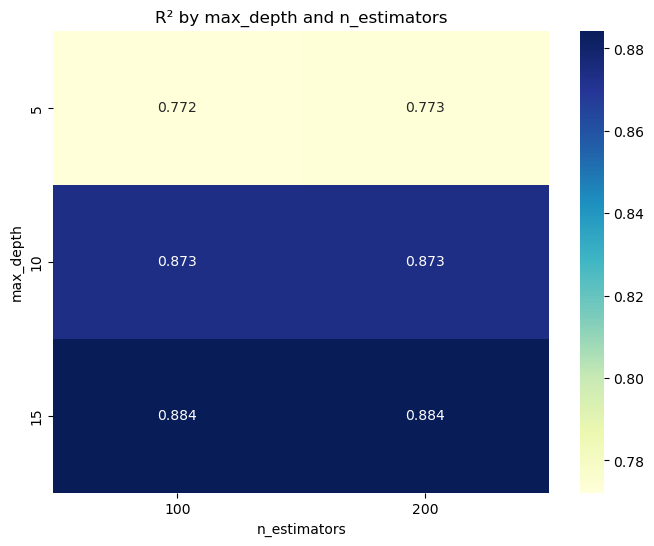

XGBoost
RMSE: 424.39443990820615
R² Score: 0.881
Cross-validated R²: 0.873 ± 0.026926


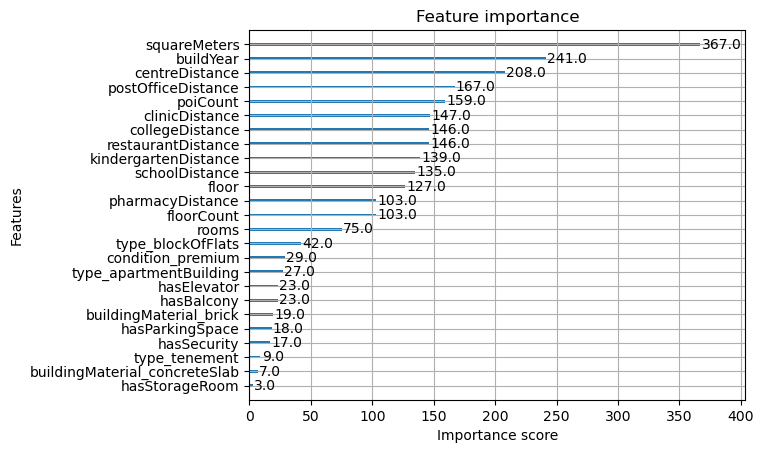

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best R²: 0.905
Best Params: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.6}


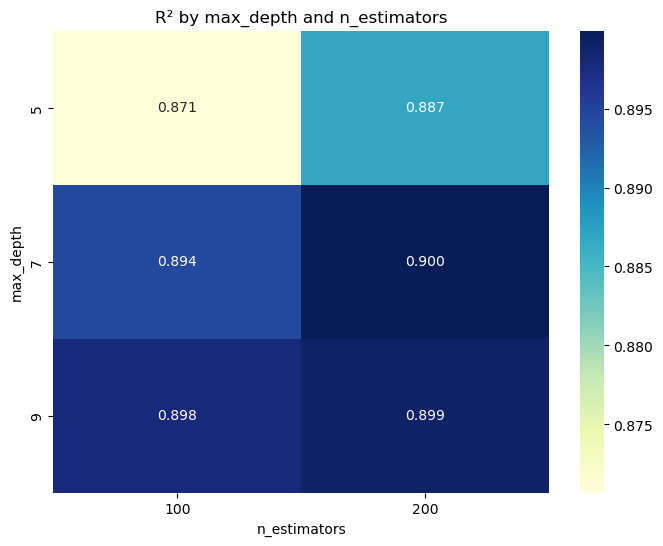

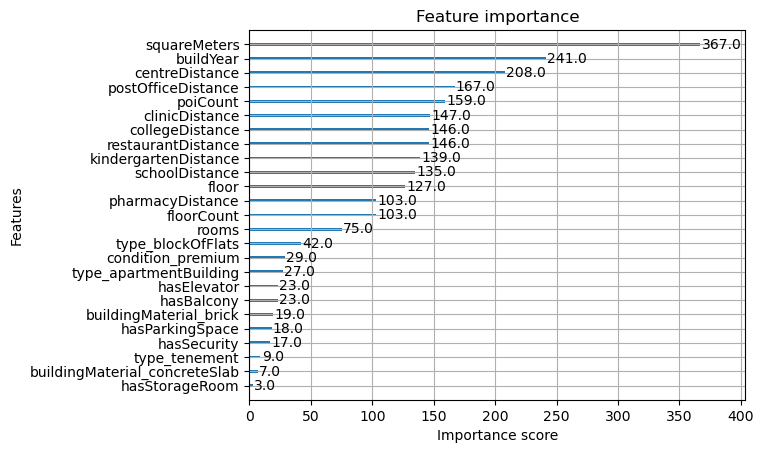

In [ ]:
import pandas as pd

# Linear regresion
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=99
)

model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

predictions = model_LR.predict(x_test)
scores = cross_val_score(model_LR, x, y, cv=5, scoring="r2")

print("Linear Regression (defalut parameters):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R²:", r2_score(y_test, predictions))
print(f"Cross-validated R^2: {np.mean(scores):.3f} ± {np.std(scores):3f}")

# Random Forest
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=100, random_state=99)
model_RF.fit(x_train, y_train)

y_pred = model_RF.predict(x_test)
r2 = r2_score(y_test, y_pred)
scores = cross_val_score(model_RF, x, y, cv=5, scoring="r2")


print("Random Forest (default parameters):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"R² Score: {r2:.3f}")
print(f"Cross-validated R²: {np.mean(scores):.3f} ± {np.std(scores):3f}")

# Parameters' performance analysis Random Forest
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
grid = GridSearchCV(
    RandomForestRegressor(random_state=99), param_grid, cv=3, scoring="r2", verbose=1, n_jobs=1
)
grid.fit(x_train, y_train)
print(f"Best R²: {grid.best_score_:.3f}")
print("Best Params:", grid.best_params_)

results = pd.DataFrame(grid.cv_results_)

pivot = results.pivot_table(
    index="param_max_depth", columns="param_n_estimators", values="mean_test_score"
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("R² by max_depth and n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

# XGBoost
from xgboost import XGBRegressor

model_XGB = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=99)

model_XGB.fit(x_train, y_train)
y_pred = model_XGB.predict(x_test)
r2 = r2_score(y_test, y_pred)
scores = cross_val_score(model_XGB, x, y, cv=5, scoring="r2")

print("XGBoost (default parameters):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"R² Score: {r2:.3f}")
print(f"Cross-validated R²: {np.mean(scores):.3f} ± {np.std(scores):3f}")

# Parameters' performance analysis XGBoost
param_grid={
    'n_estimators':[100,200],
    'max_depth':[5,7,9],
    'learning_rate':[0.05,0.1,0.2],
    'subsample':[0.6,0.8,1]
}
grid =GridSearchCV(XGBRegressor(random_state=99),param_grid,cv=3,scoring="r2",verbose=1)
grid.fit(x_train,y_train)
print(f"Best R²: {grid.best_score_:.3f}")
print("Best Params:", grid.best_params_)

results = pd.DataFrame(grid.cv_results_)

pivot = results.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("R² by max_depth and n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

from xgboost import plot_importance
plot_importance(model_XGB)
plt.show()